# Testing Env Recons


In [10]:
! pip install scikit-image

ipywidgets 7.4.1 requires widgetsnbextension~=3.4.0, which is not installed.


In [7]:
from skimage import measure

In [2]:
help(skimage)

NameError: name 'skimage' is not defined

In [6]:
%matplotlib notebook
import sigpy as sp
import sigpy.mri as mr 
import sigpy.plot as pl
import os 
import matplotlib.pyplot as plt 
from cs285.infrastructure.env import *
from scipy import stats

In [50]:
def calc_snr(fs):
    def snr_fn(img): 
        mean_signal = np.mean(img)
        signal_diff = img - mean_signal
        var_signal = np.sum(np.mean(signal_diff**2))          ## variance of orignal data
        noise = img - fs
        mean_noise = np.mean(noise)
        noise_diff = noise - mean_noise
        var_noise = np.sum(np.mean(noise_diff**2))  
        if var_noise == 0:
            snr = 100                                       ## clean image
        else:
            snr = (np.log10(var_signal/var_noise))*10 
        return snr 
    return snr_fn

snr = calc_snr(e.fully_sampled)

In [35]:
'''
args['mask_shape']
args['ksp_data_path']
args['coord']
args['total_var'] # use total variation or not.
args['loss_type'] # this is 1 for l1, or 2 for l2.
args['cartesian'] # true or false.
args['history_length'])
'''
print('', end='')

In [7]:
path = '/mikRAID/frank/data/cube_knees/train_ksp_slices'

In [8]:
args = {} 
args['mask_shape'] = (256,256)
args['ksp_data_path']  = path 
args['coord'] = None
args['total_var'] = False # use total variation or not.
args['loss_type'] = 3 #  this is 1 for l1, or 2 for l2.
args['cartesian'] = True  # true or false.
args['history_length'] = 10000 

e = Env(args)

{'ksp_data_path': '/mikRAID/frank/data/cube_knees/train_ksp_slices', 'coord': None, 'mask_shape': (256, 256), 'cartesian': True, 'history_length': 10000, 'loss_type': 3, 'total_var': False}


In [18]:
def multi_slice_viewer(volume):
#     remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])



In [24]:
v = np.array([e.prev_step, e.fully_sampled])

<IPython.core.display.Javascript object>


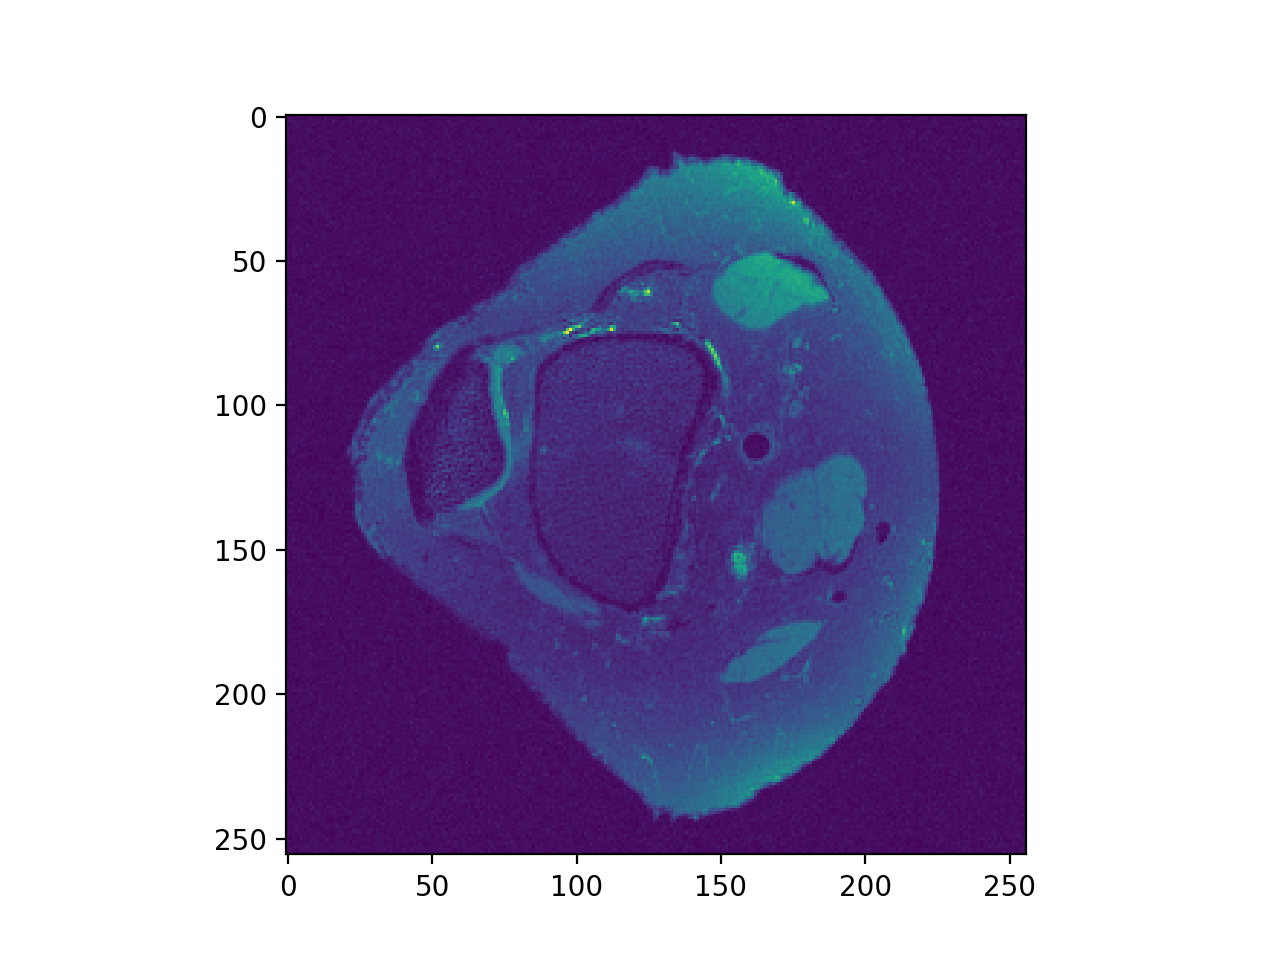

In [25]:
multi_slice_viewer(v)

In [75]:
snrs = []
for i in range(256): 
    act = e.sample()
    img, re, done = e.step(act)
    snrs.append(snr(img.transpose(2,1,0)[0]))
    

39
SSIM LOSS: 0.16500641804338861
38
SSIM LOSS: 0.20317072066790917
idx: 1 
action: [146], last_action: [147], diff: 1
Reward: 0.03816430262452056
37
SSIM LOSS: 0.23161686929902947
idx: 2 
action: [145], last_action: [146], diff: 1
Reward: 0.0284461486311203
36
SSIM LOSS: 0.25484868045630166
idx: 3 
action: [144], last_action: [145], diff: 1
Reward: 0.023231811157272186
35


/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]
/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


SSIM LOSS: 0.27238710669553695
idx: 4 
action: [143], last_action: [144], diff: 1
Reward: 0.017538426239235294
34
SSIM LOSS: 0.29103993842752496
idx: 5 
action: [142], last_action: [143], diff: 1
Reward: 0.018652831731988007
33
SSIM LOSS: 0.3101245549367593
idx: 6 
action: [141], last_action: [142], diff: 1
Reward: 0.01908461650923432
32
SSIM LOSS: 0.32663071290048024
idx: 7 
action: [140], last_action: [141], diff: 1
Reward: 0.016506157963720958
31
SSIM LOSS: 0.3419979533906483
idx: 8 
action: [139], last_action: [140], diff: 1
Reward: 0.015367240490168077
30
SSIM LOSS: 0.3564415882319332
idx: 9 
action: [138], last_action: [139], diff: 1
Reward: 0.014443634841284914
29
SSIM LOSS: 0.37113436999716215
idx: 10 
action: [137], last_action: [138], diff: 1
Reward: 0.014692781765228924
28
SSIM LOSS: 0.3864619285632819
idx: 11 
action: [136], last_action: [137], diff: 1
Reward: 0.015327558566119726
27
SSIM LOSS: 0.40047795074331743
idx: 12 
action: [135], last_action: [136], diff: 1
Reward: 

SSIM LOSS: 0.9204609086498672
idx: 82 
action: [86], last_action: [169], diff: 83
Reward: 0.0010795830048856425
SSIM LOSS: 0.921877256247793
idx: 83 
action: [170], last_action: [86], diff: 84
Reward: 0.00141634759792586
SSIM LOSS: 0.9230554915478549
idx: 84 
action: [85], last_action: [170], diff: 85
Reward: 0.0011782353000618917
SSIM LOSS: 0.9244163765769859
idx: 85 
action: [171], last_action: [85], diff: 86
Reward: 0.0013608850291310093
SSIM LOSS: 0.9254352866333393
idx: 86 
action: [84], last_action: [171], diff: 87
Reward: 0.0010189100563533504
SSIM LOSS: 0.9267392636161805
idx: 87 
action: [172], last_action: [84], diff: 88
Reward: 0.0013039769828412373
SSIM LOSS: 0.9278079805004021
idx: 88 
action: [83], last_action: [172], diff: 89
Reward: 0.00106871688422161
SSIM LOSS: 0.9290462999146653
idx: 89 
action: [173], last_action: [83], diff: 90
Reward: 0.0012383194142631115
SSIM LOSS: 0.9300620276121725
idx: 90 
action: [82], last_action: [173], diff: 91
Reward: 0.00101572769750724

SSIM LOSS: 0.9776979519645751
idx: 160 
action: [47], last_action: [208], diff: 161
Reward: 0.00038426966516780237
SSIM LOSS: 0.9781844945524706
idx: 161 
action: [209], last_action: [47], diff: 162
Reward: 0.00048654258789548877
SSIM LOSS: 0.978561508751431
idx: 162 
action: [46], last_action: [209], diff: 163
Reward: 0.00037701419896041255
SSIM LOSS: 0.978967265032446
idx: 163 
action: [210], last_action: [46], diff: 164
Reward: 0.0004057562810150239
SSIM LOSS: 0.9793371353732019
idx: 164 
action: [45], last_action: [210], diff: 165
Reward: 0.00036987034075586234
SSIM LOSS: 0.9797531734404515
idx: 165 
action: [211], last_action: [45], diff: 166
Reward: 0.00041603806724965775
SSIM LOSS: 0.9800829127597424
idx: 166 
action: [44], last_action: [211], diff: 167
Reward: 0.00032973931929081157
SSIM LOSS: 0.9804687175544009
idx: 167 
action: [212], last_action: [44], diff: 168
Reward: 0.0003858047946585508
SSIM LOSS: 0.980802163611304
idx: 168 
action: [43], last_action: [212], diff: 169
R

SSIM LOSS: 0.9969007622426885
idx: 232 
action: [11], last_action: [244], diff: 233
Reward: 0.00014854398408881142
SSIM LOSS: 0.9970639365290553
idx: 233 
action: [245], last_action: [11], diff: 234
Reward: 0.0001631742863668073
SSIM LOSS: 0.9971879910353343
idx: 234 
action: [10], last_action: [245], diff: 235
Reward: 0.00012405450627894776
SSIM LOSS: 0.9973298414551741
idx: 235 
action: [246], last_action: [10], diff: 236
Reward: 0.0001418504198398285
SSIM LOSS: 0.9974564907085335
idx: 236 
action: [9], last_action: [246], diff: 237
Reward: 0.00012664925335936772
SSIM LOSS: 0.9976052018676537
idx: 237 
action: [247], last_action: [9], diff: 238
Reward: 0.00014871115912018507
SSIM LOSS: 0.9977078339722469
idx: 238 
action: [8], last_action: [247], diff: 239
Reward: 0.00010263210459326988
SSIM LOSS: 0.9978655276544184
idx: 239 
action: [248], last_action: [8], diff: 240
Reward: 0.00015769368217144475
SSIM LOSS: 0.9979796399036402
idx: 240 
action: [7], last_action: [248], diff: 241
Rew

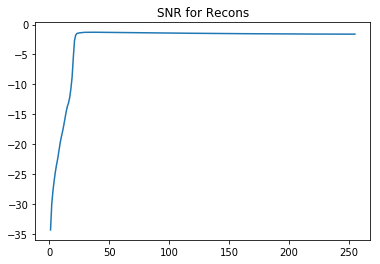

In [77]:
plt.plot(snrs)
plt.title("SNR for Recons")
plt.savefig('snr_fig.png')

In [58]:
snr(a[0].transpose(2,1,0)[0])

-55.07523537730763

In [20]:
# rewards = [] 
# for i in range(130, 230): 
#     e.step([i])
# e.save()

idx: 1 
action: [131], last_action: [130], diff: 1
Reward: -153.34830059876185
idx: 2 
action: [132], last_action: [131], diff: 1
Reward: -41.305758726579825
idx: 3 
action: [133], last_action: [132], diff: 1
Reward: -14.10579621918987
idx: 4 
action: [134], last_action: [133], diff: 1
Reward: -24.811320027146394
idx: 5 
action: [135], last_action: [134], diff: 1
Reward: -26.330700104191237
idx: 6 
action: [136], last_action: [135], diff: 1
Reward: -23.6758028722802
idx: 7 
action: [137], last_action: [136], diff: 1
Reward: -18.210370262548167
idx: 8 
action: [138], last_action: [137], diff: 1
Reward: -15.191836569746556
idx: 9 
action: [139], last_action: [138], diff: 1
Reward: -16.90933851493628
idx: 10 
action: [140], last_action: [139], diff: 1
Reward: -16.0233533284827
idx: 11 
action: [141], last_action: [140], diff: 1
Reward: -14.921620506108866
idx: 12 
action: [142], last_action: [141], diff: 1
Reward: -12.100951048729712
idx: 13 
action: [143], last_action: [142], diff: 1
Rew

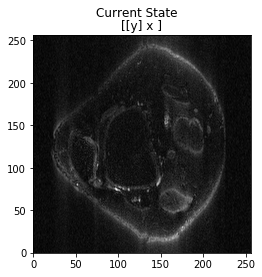

In [21]:
e.render()

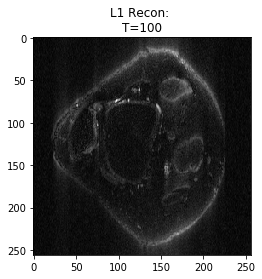

In [22]:
plt.imshow(e.next_step, cmap='gray')
plt.title("L1 Recon: \nT=100")
plt.savefig("l1_recon_t100.png")

In [113]:
measure.compare_ssim(e.next_step, e.fully_sampled)

/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


0.9856195678273253

In [ ]:
import sigpy.plot as pl

pl.plot()

In [43]:
e.step_idx

256

In [70]:

losses_ssim = np.load('./crap/losses_ssim.npy')
rewards = np.load('rewards_256.npy')

In [45]:
l

array([5.33394221e-02, 5.19115824e-02, 5.08222174e-02, 4.98262574e-02,
       4.89407809e-02, 4.81289810e-02, 4.73348348e-02, 4.64567965e-02,
       4.55004301e-02, 4.45690428e-02, 4.37664263e-02, 4.28464394e-02,
       4.16570448e-02, 4.00000705e-02, 3.83353384e-02, 3.71748427e-02,
       3.51567140e-02, 3.20343674e-02, 2.73758627e-02, 1.52869239e-02,
       6.02019495e-03, 4.09678406e-03, 3.52591475e-03, 3.17406640e-03,
       3.01891781e-03, 2.87431573e-03, 2.67166357e-03, 2.54100220e-03,
       2.46149838e-03, 2.40533815e-03, 2.33526064e-03, 2.25302383e-03,
       2.19422147e-03, 2.15228688e-03, 2.11610985e-03, 2.07960409e-03,
       2.04303827e-03, 2.00962355e-03, 1.97334781e-03, 1.93733250e-03,
       1.89163834e-03, 1.83528229e-03, 1.79163750e-03, 1.74365692e-03,
       1.71076802e-03, 1.66828966e-03, 1.63970723e-03, 1.60362178e-03,
       1.57749939e-03, 1.54057028e-03, 1.51491780e-03, 1.48172953e-03,
       1.46019558e-03, 1.43230061e-03, 1.41358580e-03, 1.38627414e-03,
      

In [71]:
# le = []
len(le)
def smooth(losses, rewards=[]): 
    l = losses/ np.sum(losses)
    r = rewards/ np.sum(rewards)
    re = [] 
    le = [] 
    tot = 0 
    total_le = 0
    for i in range(len(r)): 
        tot += r[i]
        total_le += l[i]
        le.append(total_le)
        re.append(tot)
    og_re = re.copy()
    re = np.array(list(zip(re, np.arange(256))))
    np.array(re).shape
    return le, og_re

losses_l2 = np.load('losses_256.npy')
ssim_l, _ = smooth(losses_ssim, np.abs(losses_ssim))

In [72]:
l = losses / np.sum(np.abs(losses))
r = rewards/ np.sum(rewards)
re = [] 
le = [] 
tot = 0 
total_le = 0
for i in range(256): 
    tot += r[i]
    total_le += l[i]
    le.append(total_le)
    re.append(tot)
og_re = re.copy()


In [73]:
re = np.abs(rewards)
le = np.abs(losses)

In [90]:
a = np.array(losses_l2[:20])-100
b= np.array(losses_l2[20:])

In [98]:
c = list(a)
c.extend(list(b))

In [107]:
np.save("./crap/l2_loss.npy",np.array(smooth(c,losses_l2)[0]))

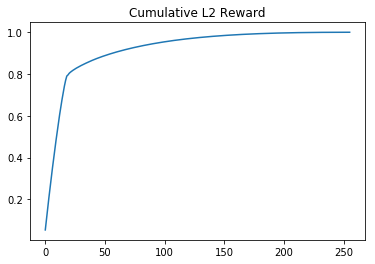

In [106]:
plt.plot(smooth(c,losses_l2)[0])
# plt.plot(ssim_l, label='ssim')
# plt.legend()
plt.title("Cumulative L2 Reward")
plt.savefig("cum_l2_re.png")

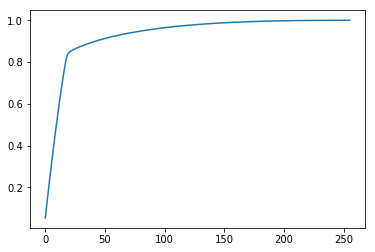

In [104]:
plt.plot(ssim_l)

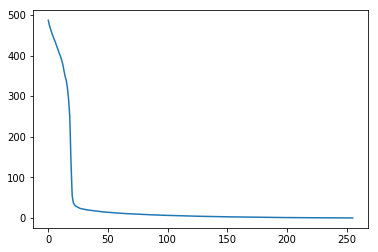

In [81]:
plt.plot(losses_l2-10)

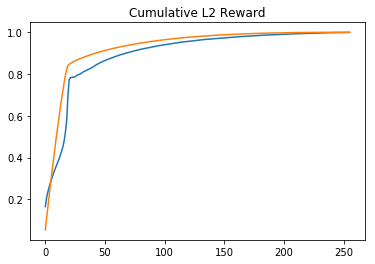

In [74]:
# plt.plot(le)
plt.figure()
plt.title("Cumulative L2 Reward")
plt.plot(le)
plt.plot(ssim_l)
# plt.savefig("cum_l2_re.png", box_tight="tight")

In [32]:
imgs = [] 

{'total_var': False, 'cartesian': True, 'history_length': 10000, 'mask_shape': (256, 256), 'ksp_data_path': '/mikRAID/frank/data/cube_knees/train_ksp_slices', 'loss_type': 3, 'coord': None}
39
38
idx: 1 
action: [146], last_action: [147], diff: 1
Reward: 1.0381643026245206
37
idx: 2 
action: [145], last_action: [146], diff: 1
Reward: 0.02844614863112027


/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


36
idx: 3 
action: [144], last_action: [145], diff: 1
Reward: 0.023231811157272242
35
idx: 4 
action: [143], last_action: [144], diff: 1
Reward: 0.017538426239235294
34
idx: 5 
action: [142], last_action: [143], diff: 1
Reward: 0.018652831731988062
33
idx: 6 
action: [141], last_action: [142], diff: 1
Reward: 0.01908461650923421
32
idx: 7 
action: [140], last_action: [141], diff: 1
Reward: 0.016506157963720902
31
idx: 8 
action: [139], last_action: [140], diff: 1
Reward: 0.015367240490168133
30
idx: 9 
action: [138], last_action: [139], diff: 1
Reward: 0.014443634841284858
29
idx: 10 
action: [137], last_action: [138], diff: 1
Reward: 0.014692781765228924
28
idx: 11 
action: [136], last_action: [137], diff: 1
Reward: 0.015327558566119892
27
idx: 12 
action: [135], last_action: [136], diff: 1
Reward: 0.014016022180035392
26
idx: 13 
action: [134], last_action: [135], diff: 1
Reward: 0.01811554417761352
25
idx: 14 
action: [133], last_action: [134], diff: 1
Reward: 0.017929959213058844
2

idx: 108 
action: [73], last_action: [182], diff: 109
Reward: 217.00071216698507
idx: 109 
action: [183], last_action: [73], diff: 110
Reward: -218.9990562921804
idx: 110 
action: [72], last_action: [183], diff: 111
Reward: 221.00076830757945
idx: 111 
action: [184], last_action: [72], diff: 112
Reward: -222.9991380889055
idx: 112 
action: [71], last_action: [184], diff: 113
Reward: 225.00072755064434
idx: 113 
action: [185], last_action: [71], diff: 114
Reward: -226.99911786640823
idx: 114 
action: [70], last_action: [185], diff: 115
Reward: 229.00068031931625
idx: 115 
action: [186], last_action: [70], diff: 116
Reward: -230.999080783158
idx: 116 
action: [69], last_action: [186], diff: 117
Reward: 233.00065276626495
idx: 117 
action: [187], last_action: [69], diff: 118
Reward: -234.999158244316
idx: 118 
action: [68], last_action: [187], diff: 119
Reward: 237.0006108270999
idx: 119 
action: [188], last_action: [68], diff: 120
Reward: -238.99917478338003
idx: 120 
action: [67], last_

idx: 211 
action: [234], last_action: [22], diff: 212
Reward: -422.99979588179497
idx: 212 
action: [21], last_action: [234], diff: 213
Reward: 425.0001899898972
idx: 213 
action: [235], last_action: [21], diff: 214
Reward: -426.9997320952501
idx: 214 
action: [20], last_action: [235], diff: 215
Reward: 429.000208649034
idx: 215 
action: [236], last_action: [20], diff: 216
Reward: -430.9997711889258
idx: 216 
action: [19], last_action: [236], diff: 217
Reward: 433.0001500823681
idx: 217 
action: [237], last_action: [19], diff: 218
Reward: -434.9997990727423
idx: 218 
action: [18], last_action: [237], diff: 219
Reward: 437.00018627223403
idx: 219 
action: [238], last_action: [18], diff: 220
Reward: -438.9997956896792
idx: 220 
action: [17], last_action: [238], diff: 221
Reward: 441.00017337227996
idx: 221 
action: [239], last_action: [17], diff: 222
Reward: -442.9997771237531
idx: 222 
action: [16], last_action: [239], diff: 223
Reward: 445.00017678775146
idx: 223 
action: [240], last_a

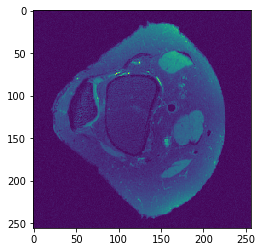

In [29]:
actions20 = list(range(118, 138))
# second_set = list(range(130,  y))
# actions.extend(second_set)

rewards = []
e = Env(args)

count = 256 
while count != 0:  
    act = e.sample()
    count -= 1
    rewards.append(e.step(act)[1])
# e.reset()
print(np.argmin(rewards))

# imgs.append(e.next_step)
plt.imshow(e.next_step)

In [33]:
!ls | grep losses_256

losses_256.npy


In [32]:
print(e.step_idx)
e.save()

256


In [61]:
ssim_img = imgs[2]
l1_img = imgs[3]
l2_img = imgs[4]

In [69]:
help(f)

Help on Figure in module matplotlib.figure object:

class Figure(matplotlib.artist.Artist)
 |  The Figure instance supports callbacks through a *callbacks* attribute
 |  which is a `.CallbackRegistry` instance.  The events you can connect to
 |  are 'dpi_changed', and the callback will be called with ``func(fig)`` where
 |  fig is the `Figure` instance.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure patch.
 |  
 |  suppressComposite
 |      For multiple figure images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars

/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


Text(0.5,0.98,'10x Undersampling')

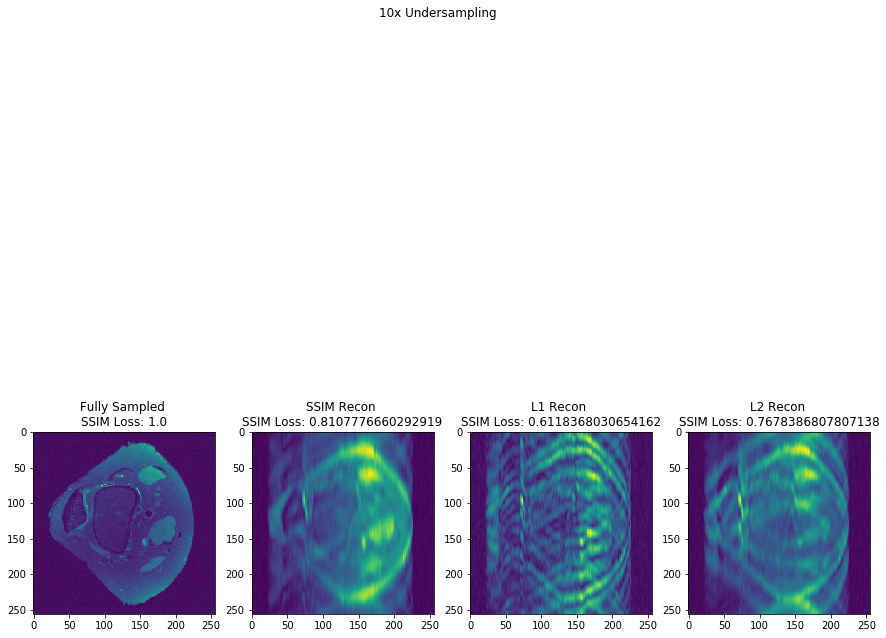

In [77]:
f, ax = plt.subplots(1, 4, figsize=(15,15))
ax[0].imshow(e.fully_sampled)
ax[0].set_title("Fully Sampled \nSSIM Loss: 1.0")
ax[1].imshow(ssim_img)
ax[1].set_title("SSIM Recon \nSSIM Loss: {}".format(ssim(ssim_img, e.fully_sampled)))
ax[2].imshow(l1_img)
ax[2].set_title("L1 Recon \nSSIM Loss: {}".format(ssim(l1_img, e.fully_sampled)))
ax[3].imshow(l2_img)
ax[3].set_title("L2 Recon \nSSIM Loss: {}".format(ssim(l2_img, e.fully_sampled)))
f.suptitle('10x Undersampling')


/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


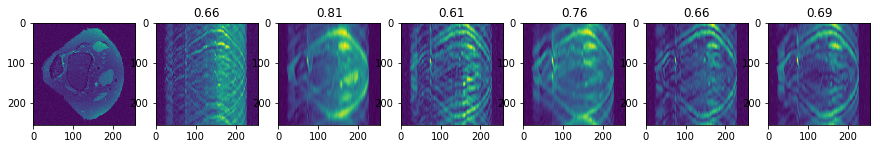

In [58]:
f, ax  = plt.subplots(1,len(imgs),figsize=(15,15))
ax[0].imshow(e.fully_sampled)
for i in range(1, len(imgs)):
    ax[i].imshow(imgs[i])
    ax[i].set_title(str(ssim(e.fully_sampled,imgs[i]))[:4])

In [53]:
ssim(e.fully_sampled, imgs[5])

/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


0.6609148998910735

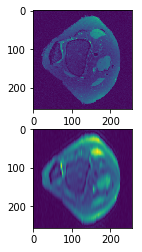

In [28]:
fig, axes = plt.subplots(2,1)
axes[0,].imshow(e.fully_sampled)
axes[1,].imshow(e.next_step)

In [9]:
from skimage.measure import compare_ssim as ssim

ssim(e.next_step, e.fully_sampled, data_range=1)

/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


0.7409433216067199

In [8]:
rewards

[0.2111779475074821,
 -0.939706029087681,
 0.041248248225202344,
 0.03265081958511673,
 0.02673268418375896,
 0.028731607160170425,
 0.03745370343326537,
 0.04084009743388983,
 0.07994559885163532,
 0.13129662290692556,
 0.04661894374007691,
 -0.0058327577857482105,
 -0.004128091413209578,
 -0.0012929402673624857,
 -0.002368333315498683,
 0.0029027234663925316,
 0.004192970844496879,
 0.003329580410313171,
 0.0032164590754053535,
 0.003933466652089934]

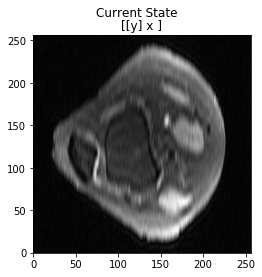

In [100]:
e.render()

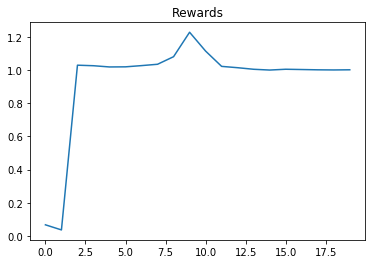

In [116]:
import matplotlib.pyplot as plt 

plt.figure()
plt.title("Rewards")
plt.plot()

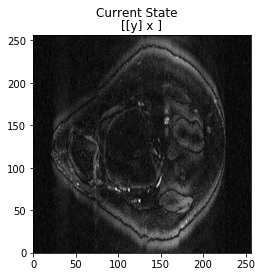

In [34]:
e.render()

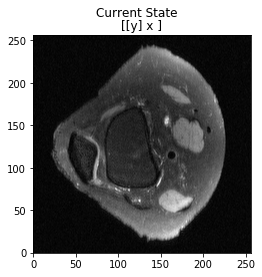

In [39]:

e.render()

In [10]:
e = Env(args)
for i in range(0, 256, 2): 
    e.step([i])

{'coord': None, 'mask_shape': (256, 256), 'cartesian': True, 'total_var': False, 'loss_type': 3, 'history_length': 10000, 'ksp_data_path': '/mikRAID/frank/data/cube_knees/train_ksp_slices'}
idx: 1 
action: [2], last_action: [0], diff: 2
Reward: -1.9839898905818534
idx: 2 
action: [4], last_action: [2], diff: 2
Reward: 0.01339526276021985


/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


idx: 3 
action: [6], last_action: [4], diff: 2
Reward: 0.012521624494352679
idx: 4 
action: [8], last_action: [6], diff: 2
Reward: 0.010990841343928803
idx: 5 
action: [10], last_action: [8], diff: 2
Reward: 0.011113098810624944
idx: 6 
action: [12], last_action: [10], diff: 2
Reward: 0.009821771413555558
idx: 7 
action: [14], last_action: [12], diff: 2
Reward: 0.01047444865771352
idx: 8 
action: [16], last_action: [14], diff: 2
Reward: 0.00937959145324685
idx: 9 
action: [18], last_action: [16], diff: 2
Reward: 0.009325788538766977
idx: 10 
action: [20], last_action: [18], diff: 2
Reward: 0.009172997051187348
idx: 11 
action: [22], last_action: [20], diff: 2
Reward: 0.008156704549435956
idx: 12 
action: [24], last_action: [22], diff: 2
Reward: 0.008140388839081858
idx: 13 
action: [26], last_action: [24], diff: 2
Reward: 0.007836068600570067
idx: 14 
action: [28], last_action: [26], diff: 2
Reward: 0.008359870982626916
idx: 15 
action: [30], last_action: [28], diff: 2
Reward: 0.007878

idx: 111 
action: [222], last_action: [220], diff: 2
Reward: 0.0004234795099369304
idx: 112 
action: [224], last_action: [222], diff: 2
Reward: 0.0003488540867737644
idx: 113 
action: [226], last_action: [224], diff: 2
Reward: 0.000365299331152924
idx: 114 
action: [228], last_action: [226], diff: 2
Reward: 0.00036631009285637006
idx: 115 
action: [230], last_action: [228], diff: 2
Reward: 0.0003484364019250563
idx: 116 
action: [232], last_action: [230], diff: 2
Reward: 0.0003230079592260182
idx: 117 
action: [234], last_action: [232], diff: 2
Reward: 0.0003112328149241783
idx: 118 
action: [236], last_action: [234], diff: 2
Reward: 0.00029465442194154257
idx: 119 
action: [238], last_action: [236], diff: 2
Reward: 0.0002813428570405119
idx: 120 
action: [240], last_action: [238], diff: 2
Reward: 0.00022533747825770334
idx: 121 
action: [242], last_action: [240], diff: 2
Reward: 0.0002599897295723075
idx: 122 
action: [244], last_action: [242], diff: 2
Reward: 0.0002491241815887335
id

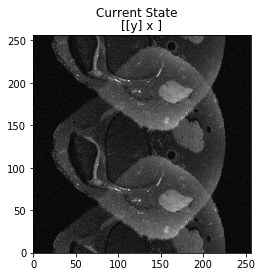

In [11]:
e.render()

In [16]:
np.sum(np.square(e.fully_sampled - e.next_step))

364.9930687472006

In [12]:
ssim(e.fully_sampled, e.next_step, data_range=1)

/home/gnahum/anaconda3/envs/proj/lib/python3.5/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


0.7695469296784211

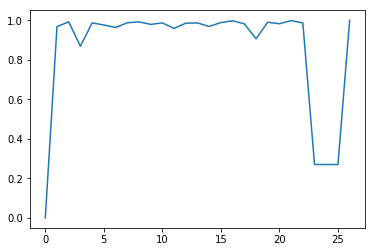

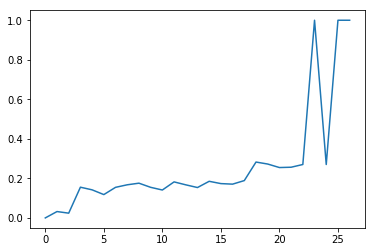

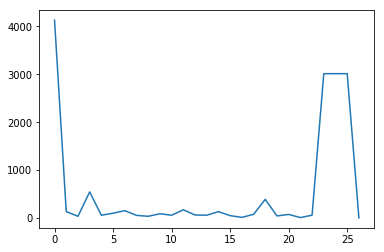

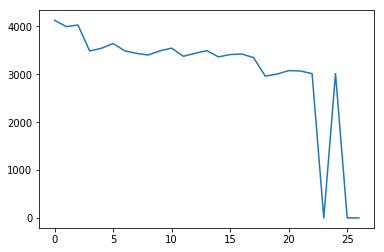

In [204]:
plt.figure()
plt.plot(r)
plt.figure()
plt.plot(l)
plt.figure()
plt.plot(rewards)

plt.figure()
plt.plot(losses)

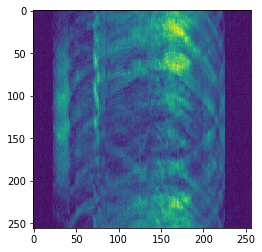

In [144]:
plt.imshow(img23)

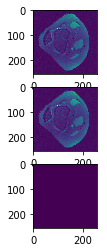

In [58]:

fig, axes = plt.subplots(3,1)
axes[0].imshow(pre)
axes[1].imshow(post)
axes[2].imshow(post - pre)

In [49]:
mask51[88]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [55]:
mask50[120]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [67]:
diff_mask = mask101 - mask100
(mask101 == mask100).all()

True

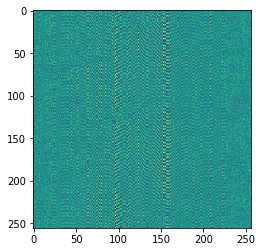

In [62]:
diff_img = img101 - img100

plt.imshow(diff_img)

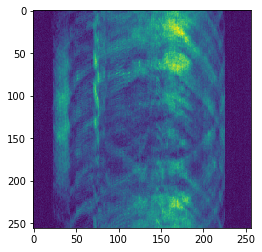

In [115]:
plt.imshow(img26)

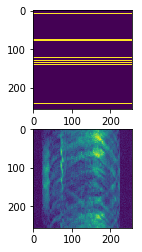

In [114]:
fig, axes = plt.subplots(2,1)
axes[0].imshow(mask26)
axes[1].imshow(img26)

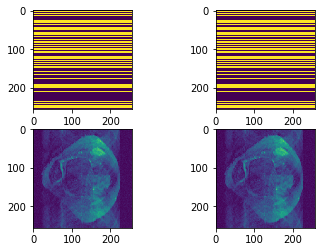

In [61]:
fig, axes = plt.subplots(2,2)

axes[0,0].imshow(mask100)
axes[0,1].imshow(mask101)
axes[1,0].imshow(img100)
axes[1,1].imshow(img101)